In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set_theme()
from scipy.integrate import quad
import timeit
import pandas as pd

In [39]:
# functions -----------------------

f = lambda x: np.exp(-x**2)

A = 1/(1-np.exp(-2))
g = lambda x: A*np.exp(-x)

In [3]:
def simple_monte_carlo(number_of_samples: int):
    '''calculate integral of f in range [0, 2) with simple Monte Carlo'''
    
    x = np.random.random(number_of_samples) * 2
    
    I = 2 * f(x).mean()
    
    return I, x

In [21]:
def important_sampling_monte_carlo(number_of_samples: int):
    '''calculate integral of f in range [0, 2) with important sampling Monte Carlo'''
    
    x = np.random.random(number_of_samples)
    
    # generate y with g(x)=A*exp(-x) probability distribution
    y = -np.log(1-x/A)
            
    I = (f(y)/g(y)).mean()
    
    return I, y

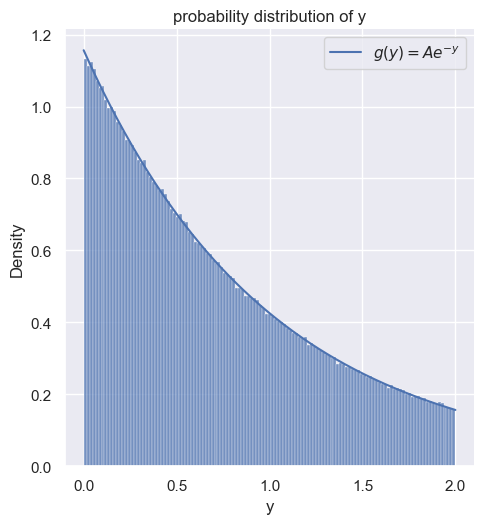

In [22]:
# test the random generator ------------

x = np.random.random(1000000)

# generate y with g(x)=exp(-x) probability distribution
A = 1/(1-np.exp(-2))
y = -np.log(1-x/A)

# draw normalized histogram of y
sn.displot(y, stat="density")

# draw line: y = exp(-x) with Domain: [0, 2]
domain = np.linspace(0, 2, 300)
plt.plot(domain, A*np.exp(-domain), label=r"$g(y)=Ae^{-y}$")

plt.xlabel("y")
plt.title("probability distribution of y")
plt.legend()
plt.show()

In [23]:
def scipy_integral():
    '''calculate integral of f in range [0, 2] using scipy'''
    
    I, err = quad(f, 0, 2)
    
    return I

In [24]:
def main():
    number_of_iterations = int(input("number of iterations: "))
    
    # initiate arrays
    # ---------------
    number_of_samples     = np.zeros(number_of_iterations, dtype=np.int32)
    I_simple              = np.zeros(number_of_iterations)
    I_important           = np.zeros(number_of_iterations)
    I_scipy               = np.zeros(number_of_iterations)
    stat_error_simple     = np.zeros(number_of_iterations)
    stat_error_important  = np.zeros(number_of_iterations)
    error_simple_scipy    = np.zeros(number_of_iterations)
    error_important_scipy = np.zeros(number_of_iterations)
    runtime_simple        = np.zeros(number_of_iterations)
    runtime_important     = np.zeros(number_of_iterations)
    runtime_scipy         = np.zeros(number_of_iterations)
    
    # do calculations
    # ---------------
    for n in range(number_of_iterations):
        number_of_samples[n] = n * 1000 + 100
        
        # integral and runime calculations
        # -------------------------------
        start             = timeit.default_timer()
        I_simple[n], x    = simple_monte_carlo(number_of_samples[n])    
        stop              = timeit.default_timer()
        runtime_simple[n] = stop - start

        start                = timeit.default_timer()
        I_important[n], y    = important_sampling_monte_carlo(number_of_samples[n])
        stop                 = timeit.default_timer()
        runtime_important[n] = stop - start

        start            = timeit.default_timer()
        I_scipy[n]       = scipy_integral()
        stop             = timeit.default_timer()
        runtime_scipy[n] = stop - start

        # error calculations
        # -----------------                
        stat_error_simple[n]    = np.sqrt( (f(x)**2).mean() - f(x).mean()**2 )/np.sqrt(number_of_samples[n])
        stat_error_important[n] = np.sqrt( ((f(y)/g(y))**2).mean() - (f(y)/g(y)).mean()**2 )/np.sqrt(number_of_samples[n])
        

        error_simple_scipy[n]    = np.abs((I_simple[n] - I_scipy[n])/(I_scipy[n])*100)
        error_important_scipy[n] = np.abs((I_important[n] - I_scipy[n])/(I_scipy[n])*100)
    
    # plot the results
    # ---------------------------
    plt.title("statistic error")
    plt.plot(number_of_samples, stat_error_simple, label="simple")
    plt.plot(number_of_samples, stat_error_important, label="important sampling")
    plt.xlabel("number of samples")
    plt.ylabel("error")
    plt.legend()
    
    plt.figure()
    plt.title(r"absolute of Percentage of relative error ($|\frac{I_{MonteCarlo} - I_{scipy}}{I_{scipy}}\times100|$)")
    plt.plot(number_of_samples, error_simple_scipy, label="simple")
    plt.plot(number_of_samples, error_important_scipy, label="important sampling")
    plt.xlabel("number of samples")
    plt.ylabel("error")
    plt.legend()
    
    plt.figure()
    plt.title("compare runtimes")
    plt.plot(number_of_samples, runtime_simple, label="simple")
    plt.plot(number_of_samples, runtime_important, label="important sampling")
    plt.plot(number_of_samples, runtime_scipy, label="scipy")
    plt.xlabel("number of samples")
    plt.ylabel("runtime")
    plt.legend()
    
    plt.show()
    
    # return the data table
    # ---------------------
    return pd.DataFrame({"تعداد نمونه ها"                : number_of_samples,
                         "مقدار واقعی انتگرال"            : I_scipy,
                         "مقدار انتگرال با نمونه گیری ساده"   : I_simple,
                         "مقدار انتگرال با نمونه گیری هوشمند" : I_important,
                         "خطای آماری نمونه گیری ساده"     : stat_error_simple,
                         "خطای آماری نمونه گیری هوشمند"   : stat_error_important,
                         "خطای واقعی نمونه گیری ساده"     : error_simple_scipy,
                         "خطای واقعی نمونه گیری هوشمند"   : error_important_scipy, 
                         "زمان اجرای نمونه گیری ساده"     : runtime_simple,
                         "زمان اجرای نمونه گیری هوشمند"   : runtime_important
            })

number of iterations:  100


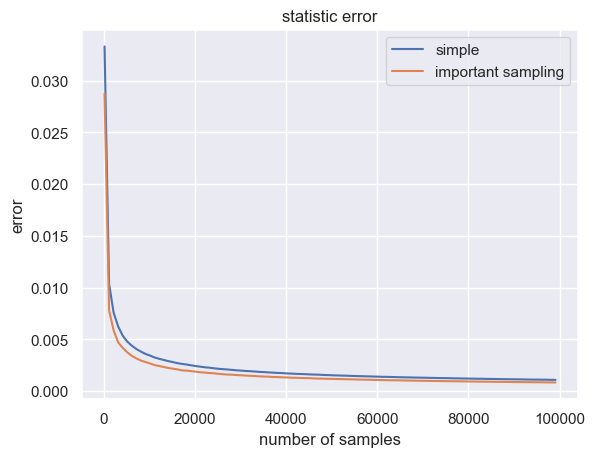

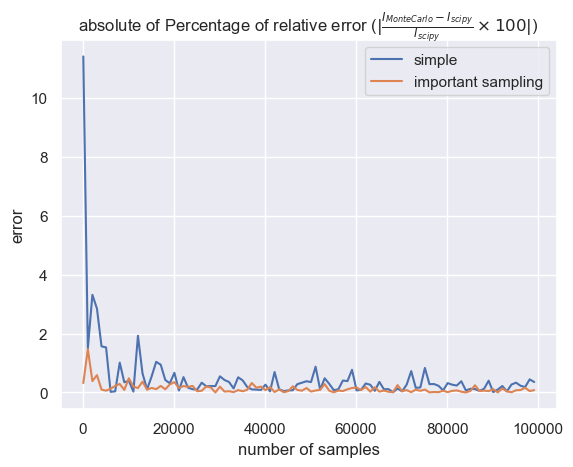

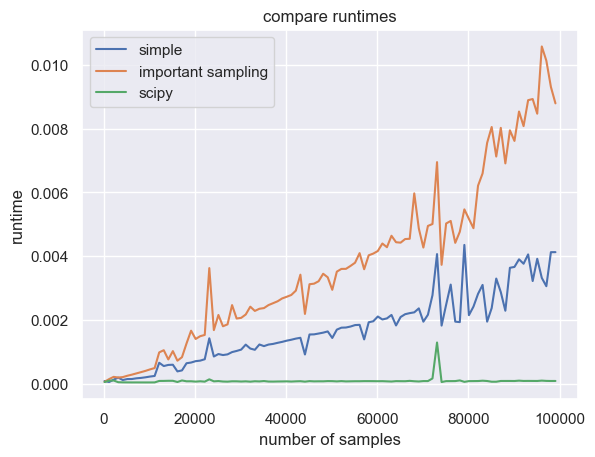

In [29]:
data = main()

In [36]:
data.head(12)

,تعداد نمونه ها,مقدار واقعی انتگرال,مقدار انتگرال با نمونه گیری ساده,مقدار انتگرال با نمونه گیری هوشمند,خطای آماری نمونه گیری ساده,خطای آماری نمونه گیری هوشمند,خطای واقعی نمونه گیری ساده,خطای واقعی نمونه گیری هوشمند,زمان اجرای نمونه گیری ساده,زمان اجرای نمونه گیری هوشمند
0,100,0.882081,0.781425,0.879273,0.033304,0.028750,11.411208,0.318393,0.000081,0.000056
1,1100,0.882081,0.868856,0.895039,0.010350,0.007785,1.499380,1.469034,0.000048,0.000139
2,2100,0.882081,0.911339,0.878681,0.007568,0.005862,3.316918,0.385444,0.000122,0.000210
3,3100,0.882081,0.907193,0.887267,0.006243,0.004715,2.846874,0.587935,0.000187,0.000189
4,4100,0.882081,0.868268,0.881208,0.005355,0.004174,1.566020,0.098959,0.000111,0.000202
5,5100,0.882081,0.868586,0.881551,0.004784,0.003753,1.529904,0.060149,0.000141,0.000245
6,6100,0.882081,0.882265,0.883220,0.004391,0.003412,0.020812,0.129120,0.000143,0.000279
7,7100,0.882081,0.882420,0.880140,0.004071,0.003162,0.038386,0.220102,0.000164,0.000319
8,8100,0.882081,0.873147,0.884638,0.003821,0.002957,1.012857,0.289831,0.000177,0.000358
9,9100,0.882081,0.885144,0.881318,0.003599,0.002817,0.347193,0.086523,0.000196,0.000399


In [37]:
data.to_csv("data.csv")